# PROJECT NAME : Fastag fraud detection
Project type - **classification**

Submitted by : **Susanta Adhikary**

Batch no : **MIP-ML-06**

**github link-**

# Project summary

This dataset is a fastag dataset. From this dataset we will predict the fraud dectection. First we clean our dataset then we apply  EDA-1 of our dataset to visualize our data. We check fraud indicator and visualize it.After using data preprocessing then we apply EDA-2 for real time prediction.Then we implement our model and calculate accuracy score,F1-score,roc-auc score.At last we use feature selection which was the most important parameter of our dataset.

# Problem statement

The project focuses on creating a machine learning-based Fast tag fraud detection system. It involves
exploring data, engineering features, building a model, and implementing real-time detection.
Challenges include imbalanced data and nuanced pattern detection, with evaluation based on precision,
recall, F1 score, accuracy and ROC-AUC score.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


#Stats-----------------------
import statsmodels.api as sm
from scipy import stats

#Model-----------------------
from sklearn.ensemble import RandomForestClassifier
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FASTtag fraud detection/FastagFraudDetection.csv')

In [ ]:
df.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [ ]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


**Duplicate value count**

In [ ]:
len(df[df.duplicated])

0

**Remove missing value or null value**

In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df=df.dropna(subset =['FastagID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

**Convert time stamp to date time**

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

**create separate column from Timestamp**

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2,0,1
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,6,1,1
5,6,2023-01-11 10:00:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud,10,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
 13  Hou

**EDA - 1**(Exploratory data analysis)

**univariate analysis**

array([[<Axes: title={'center': 'Transaction_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'Transaction_Amount'}>],
       [<Axes: title={'center': 'Amount_paid'}>,
        <Axes: title={'center': 'Vehicle_Speed'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Month'}>, <Axes: >]], dtype=object)

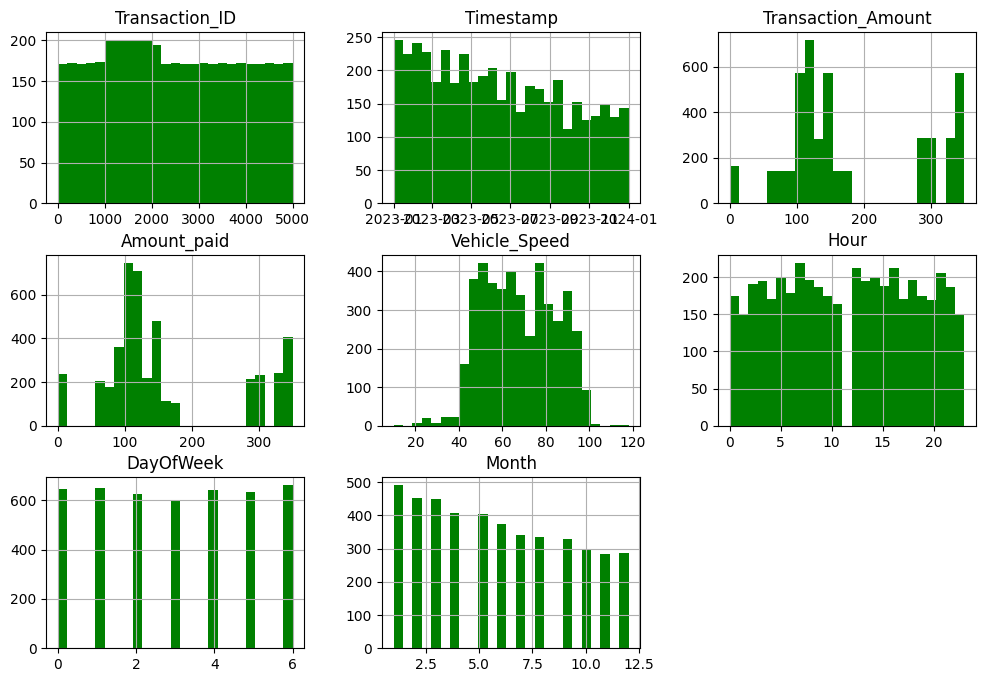

In [ ]:
df.hist(figsize=(12,8),bins=25,color='green' )

**show fraud indicator**

<Axes: xlabel='Fraud_indicator', ylabel='count'>

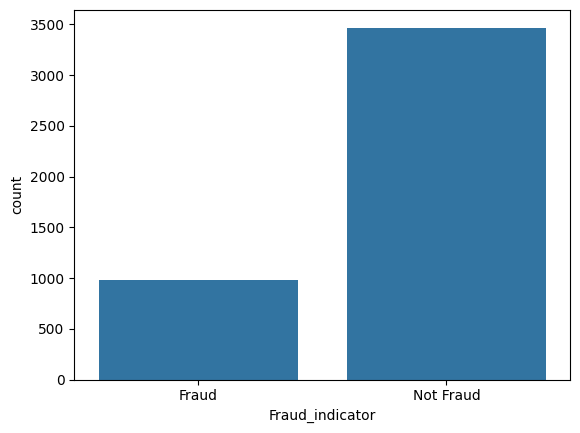

In [ ]:
sns.countplot(x='Fraud_indicator',data=df)

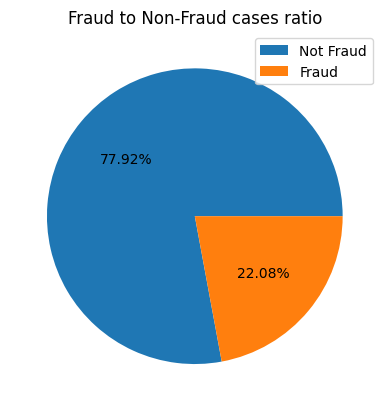

In [ ]:
counts = df["Fraud_indicator"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.title("Fraud to Non-Fraud cases ratio")
plt.show()

**Bivariate analysis**

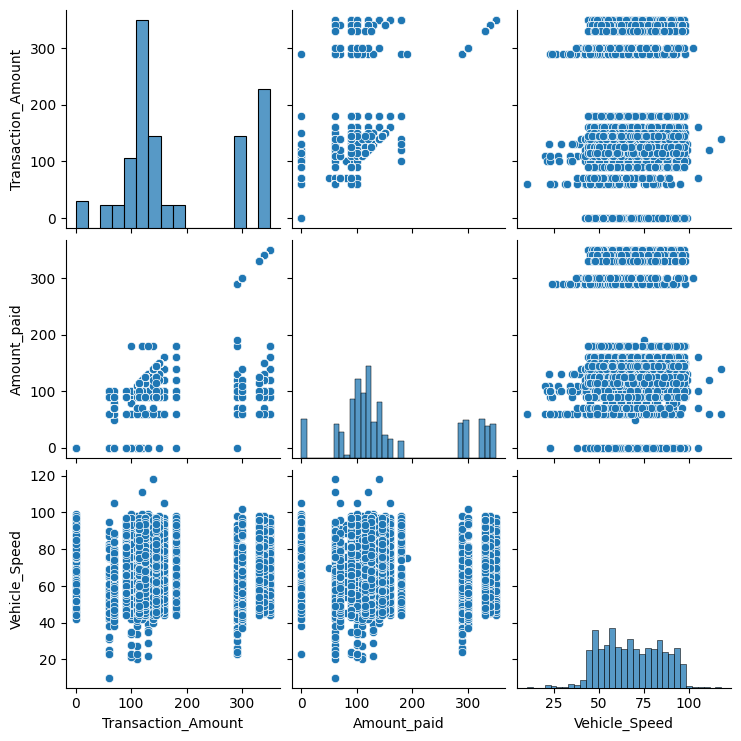

In [ ]:
#pairwise plot for numerical variable
sns.pairplot(df, vars = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

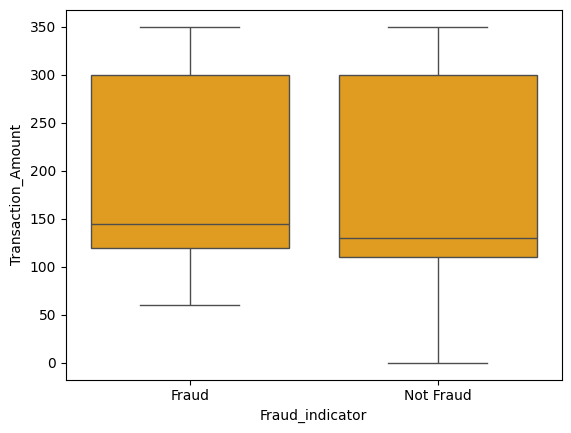

In [ ]:
# Box plot for 'Transaction_Amount'
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df,color='orange')
plt.show()

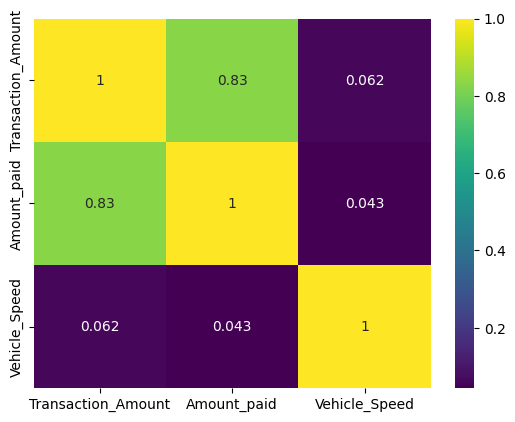

In [ ]:
# Correlation matrix and heatmap for numerical variables
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

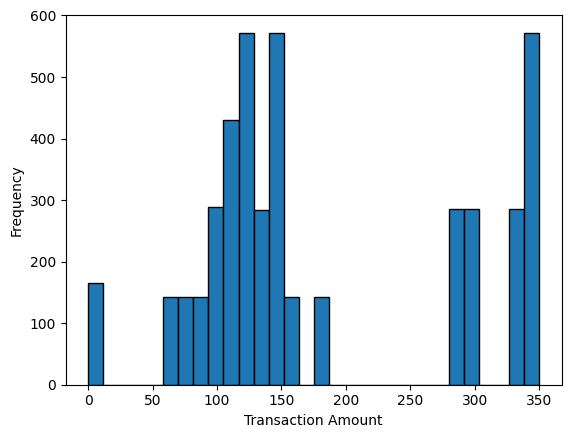

In [ ]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

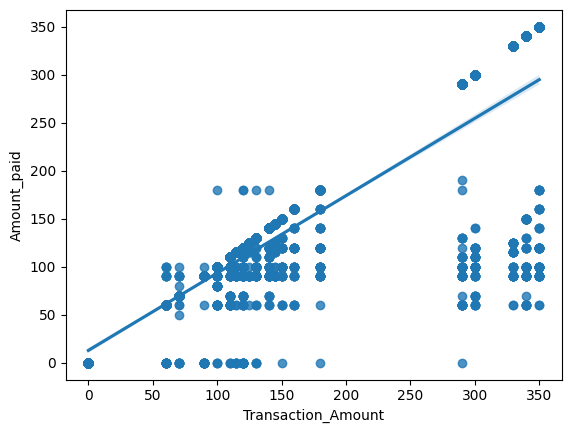

In [ ]:
# Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

**Data preprocessing**

In [ ]:
needed_cols = ["Vehicle_Type", "Lane_Type", "Vehicle_Dimensions", "Transaction_Amount", "Amount_paid",
              "Vehicle_Speed", "Month", "Hour","DayOfWeek","Fraud_indicator"]
training_df = df[needed_cols].copy()

In [ ]:
le = LabelEncoder()
categoricals = ["Vehicle_Type", "Lane_Type", "Vehicle_Dimensions", "DayOfWeek", "Fraud_indicator"]
encoders = []
for i in categoricals:
    training_df[i] = le.fit_transform(training_df[i])
    encoders += [le]

In [ ]:
#encoding categorical variables
categorical_columns = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
lb= LabelEncoder()

for col in categorical_columns:
    df[col]= lb.fit_transform(df[col].astype(str))

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,65,1327,0,11,4,1
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,78,2748,0,14,5,1
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,92,1341,0,2,0,1
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,60,2155,0,6,1,1
5,6,2023-01-11 10:00:00,4,402,0,1,1,160,100,3,105,3031,0,10,2,1


drop 'Time stamp' column for better implementation

In [ ]:
#dropping column timestamp
df=df.drop('Timestamp', axis=1)

**EDA-2**

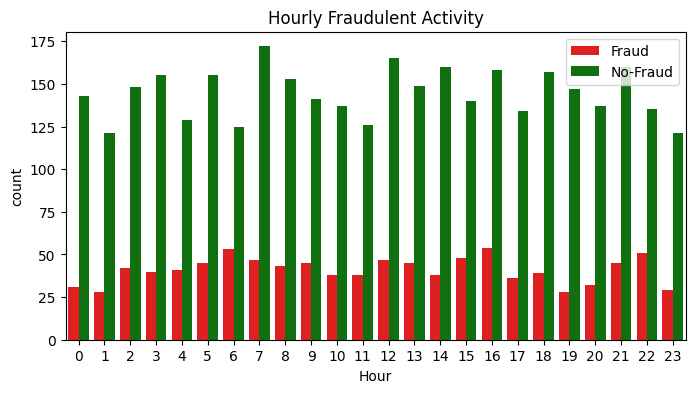

In [ ]:
#Fraudulent transaction by hour
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='Hour', hue='Fraud_indicator', palette= ['red', 'green'])
plt.title('Hourly Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.show()

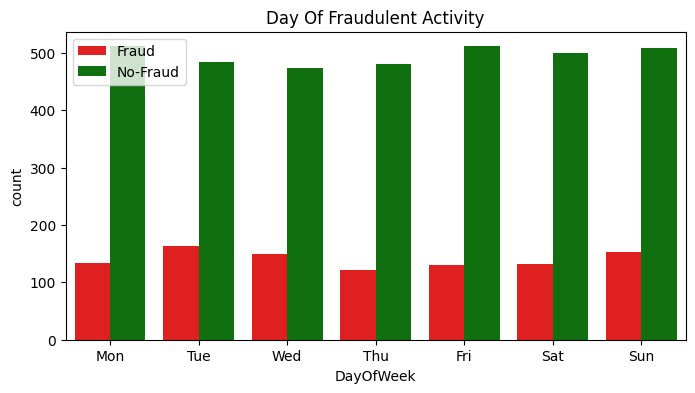

In [ ]:
#Fraudulent transaction by day of week
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='DayOfWeek', hue='Fraud_indicator', palette= ['red', 'green'])
plt.title('Day Of Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed', 'Thu', 'Fri', 'Sat','Sun'])
plt.show()

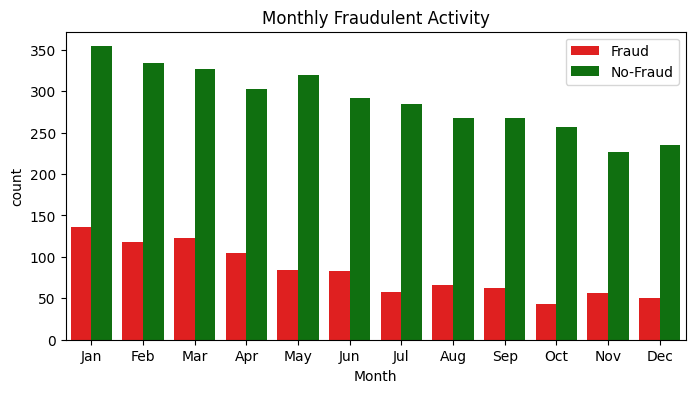

In [ ]:
#Fraudulent transaction by month
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='Month', hue='Fraud_indicator', palette= ['red', 'green'])
plt.title('Monthly Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

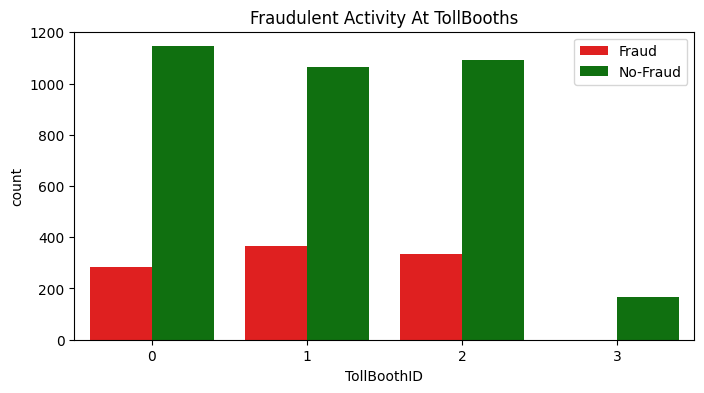

In [ ]:
#Fraudulent transaction by tollbooth
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='TollBoothID', hue='Fraud_indicator', palette= ['red', 'green'])
plt.title('Fraudulent Activity At TollBooths')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.show()

**Model implentation**

In [ ]:
#preparing training and testing samples
X= df.drop('Fraud_indicator', axis=1)
y= df['Fraud_indicator']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=20)

In [ ]:
#scaling the training samples
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
#training the model
model= RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
#making predictions
y_predicted= model.predict(X_test)

In [ ]:
#evaluation metrics
metrics= [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
results= {}

for i in metrics:
    metric_name= i.__name__
    score= i(y_test, y_predicted)
    results[metric_name] = score

print(results)

{'accuracy_score': 0.9784366576819407, 'precision_score': 0.9732739420935412, 'recall_score': 1.0, 'f1_score': 0.9864559819413092, 'roc_auc_score': 0.9497907949790795}


In [ ]:
#creating dataframe
score= pd.DataFrame(list(results.items()), columns=['Metric', 'Score'])
score


,Metric,Score
0,accuracy_score,0.978437
1,precision_score,0.973274
2,recall_score,1.000000
3,f1_score,0.986456
4,roc_auc_score,0.949791


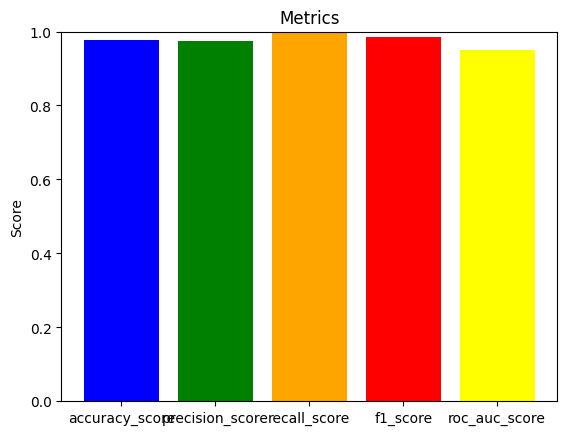

In [ ]:
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'yellow'])
plt.ylabel('Score')
plt.title('Metrics')
plt.ylim(0, 1)
plt.show()


From these parameteres, we have seen that random forest classifier model is a good fit for this dataset.

**Feature importance**

In [ ]:
#Important features
imp= model.feature_importances_
feature_name= X.columns

#creating a dataframe for the important features
imp_features= pd.DataFrame({'Feature Name': feature_name,
                            'Importance': imp})

In [ ]:
#sorting on importance
imp_features= imp_features.sort_values(by= 'Importance', ascending= False)
imp_features

,Feature Name,Importance
7,Amount_paid,0.461118
6,Transaction_Amount,0.145545
0,Transaction_ID,0.073540
10,Vehicle_Plate_Number,0.042995
2,FastagID,0.042906
3,TollBoothID,0.041070
5,Vehicle_Dimensions,0.038633
9,Vehicle_Speed,0.033300
1,Vehicle_Type,0.033194
11,Hour,0.026700


These features are sorted in their order of importance. Basically the features having the highest influence on the model's decision making are at the top of the dataframe

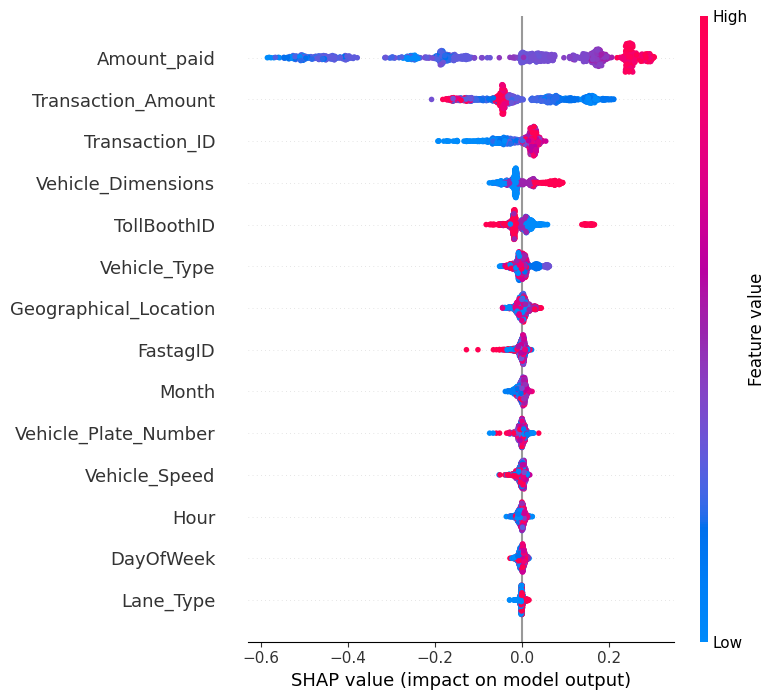

In [ ]:

#using SHAP to to visualize the contribution of features in model's decision making
explainer= shap.TreeExplainer(model)
shap_values= explainer.shap_values(X_test)

class_index= 1
shap.summary_plot(shap_values[class_index], X_test, feature_names= X.columns)

# **Conclusion**


*   This project aims to create machine learning based system which detect the FASTag fraud.
*   In this project we seen that which toolbooth use more and which type of toolbooth have chance fore fraud.

*   In this project which time vehicle gathering most and we saw that january is the peak time.
*  In this project November is the lowest for FASTag toll where car passes least.


*   We also seen that amount paid and transaction amount are the most important feature for our dataset.
*   After applying random forest classifier we get

1.  accuracy_score	0.978437

2.	precision_score	0.973274


3.	recall_score	1.000000


4.	f1_score	0.986456

5.	roc_auc_score	0.94979


*   After applying the model and seen these results it's look like a model is a good fit.










##        ---------**Thank You**--------  